<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Mayank-Gour/CP03_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2000]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2001]:
df = pd.read_csv("/content/drive/MyDrive/Mining/latest.csv")

In [2002]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [2003]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2004]:
df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     21999
noballs                   22529
byes                      22547
legbyes                   22414
penalty                   22578
wicket_type               21938
player_dismissed          21938
other_wicket_type         22578
other_player_dismissed    22578
dtype: int64

In [2005]:
#creating a wicket column to get boolean of wicket fall
df["wicket"] = df["player_dismissed"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [2006]:
#filling na values
df[["wides", "noballs", "byes", "legbyes", "penalty"]] = df[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

In [2007]:
df.wicket_type.fillna("no wicket", inplace=True)

In [2008]:
df.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [2009]:
df.player_dismissed.fillna("no wicket", inplace=True)

In [2010]:
df[["other_wicket_type", "other_player_dismissed"]] = df[["other_wicket_type", "other_player_dismissed"]].fillna("no dismissal")

In [2011]:
df.isnull().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
wicket                    0
dtype: int64

In [2012]:
#creating over and balls from ball column which is in 0.1, 0.2 format for first over
df["ball"] = df["ball"].astype(str)
df[["over", "ball_num"]] = df["ball"].str.split(".", expand=True).astype(int)
df["ball"] = df["ball"].astype(float)
df["over"] = df["over"] + 1
df["ball_left"] = 306 - (df["over"]*6 + df["ball_num"])

In [2013]:
#creating total runs column to calculate runs on each ball incusive of extras
df["total_runs"] = df["runs_off_bat"] + df["extras"]

In [2014]:
#creating innings df so we can merger total runs for each innings with in original df
innings = df.groupby(["match_id", "innings"])["total_runs"].sum().reset_index()
innings.rename(columns={"total_runs":"innings_total"}, inplace=True)

In [2015]:
#creating deliveries df and adding total runs
data = df.merge(innings, on=["match_id", "innings"])
data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,1,299,0,282
1,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,2,298,6,282
2,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,3,297,1,282
3,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,no wicket,no wicket,no dismissal,no dismissal,0,1,4,296,1,282
4,1,2023/24,05-10-2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,5,295,4,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,42,2023/24,10-11-2023,"Narendra Modi Stadium, Ahmedabad",2,46.6,South Africa,Afghanistan,AL Phehlukwayo,HE van der Dussen,...,no wicket,no wicket,no dismissal,no dismissal,0,47,6,18,1,247
22575,42,2023/24,10-11-2023,"Narendra Modi Stadium, Ahmedabad",2,46.7,South Africa,Afghanistan,HE van der Dussen,AL Phehlukwayo,...,no wicket,no wicket,no dismissal,no dismissal,0,47,7,17,2,247
22576,42,2023/24,10-11-2023,"Narendra Modi Stadium, Ahmedabad",2,47.1,South Africa,Afghanistan,AL Phehlukwayo,HE van der Dussen,...,no wicket,no wicket,no dismissal,no dismissal,0,48,1,17,6,247
22577,42,2023/24,10-11-2023,"Narendra Modi Stadium, Ahmedabad",2,47.2,South Africa,Afghanistan,AL Phehlukwayo,HE van der Dussen,...,no wicket,no wicket,no dismissal,no dismissal,0,48,2,16,4,247


In [2016]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [2017]:
teams = data.batting_team.unique()
teams

array(['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [2018]:
team_squad = {}
for team in teams:
    player_list = data[data['batting_team'] == team]['striker'].unique().tolist()
    player_list = data[data['batting_team'] == team]['non_striker'].unique().tolist()
    team_squad[team] = player_list
print(team_squad, end=' ')

{'England': ['DJ Malan', 'JM Bairstow', 'JE Root', 'HC Brook', 'MM Ali', 'JC Buttler', 'LS Livingstone', 'SM Curran', 'CR Woakes', 'AU Rashid', 'MA Wood', 'RJW Topley', 'BA Stokes', 'DJ Willey', 'AAP Atkinson'], 'New Zealand': ['WA Young', 'DP Conway', 'R Ravindra', 'DJ Mitchell', 'TWM Latham', 'GD Phillips', 'MS Chapman', 'MJ Santner', 'MJ Henry', 'KS Williamson', 'LH Ferguson', 'JDS Neesham', 'TA Boult', 'TG Southee'], 'Pakistan': ['Imam-ul-Haq', 'Fakhar Zaman', 'Babar Azam', 'Mohammad Rizwan', 'Saud Shakeel', 'Iftikhar Ahmed', 'Mohammad Nawaz', 'Shadab Khan', 'Shaheen Shah Afridi', 'Haris Rauf', 'Abdullah Shafique', 'Hasan Ali', 'Usama Mir', 'Mohammad Wasim'], 'Netherlands': ["MP O'Dowd", 'Vikramjit Singh', 'CN Ackermann', 'BFW de Leede', 'AT Nidamanuru', 'Saqib Zulfiqar', 'RE van der Merwe', 'LV van Beek', 'A Dutt', 'PA van Meekeren', 'SA Edwards', 'SA Engelbrecht', 'R Klein', 'W Barresi', 'Shariz Ahmad'], 'Afghanistan': ['Ibrahim Zadran', 'Rahmanullah Gurbaz', 'Rahmat Shah', 'Hash

In [2019]:
venue = data['venue'].unique()
venue

array(['Narendra Modi Stadium, Ahmedabad',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Maharashtra Cricket Association Stadium, Pune',
       'M Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai',
       'Eden Gardens, Kolkata'], dtype=object)

In [2020]:
date_format = '%Y-%m-%d'
data['start_date']= pd.to_datetime(data['start_date'], errors='ignore')

<ipython-input-2020-6218d3569e7d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['start_date']= pd.to_datetime(data['start_date'], errors='ignore')


In [2021]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'wicket', 'over', 'ball_num', 'ball_left',
       'total_runs', 'innings_total'],
      dtype='object')

In [2022]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [2023]:
# calculating cumulative runs for each player
data = data.sort_values(by=['match_id','innings','over', 'ball_num'])

In [2024]:
data.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,1,299,0,282
1,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,2,298,6,282
2,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,3,297,1,282


In [2025]:
data['Cumulative_Runs'] = data.groupby(['striker', 'match_id'])['runs_off_bat'].cumsum()

In [2026]:
# Calculate the cumulative count for each batsman
data['Num_Balls_Played'] = data.groupby(['striker', 'match_id']).cumcount() + 1

In [2027]:
# Calculate the strike rate for each row
data['Strike_Rate'] = round(
    (data['Cumulative_Runs'] / data['Num_Balls_Played']) * 100, 2)

In [2028]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [2029]:
data.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total,Cumulative_Runs,Num_Balls_Played,Strike_Rate
0,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,1,299,0,282,0,1,0.00
1,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,2,298,6,282,6,2,300.00
2,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,3,297,1,282,7,3,233.33
3,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,no dismissal,0,1,4,296,1,282,1,1,100.00
4,1,2023/24,2023-05-10,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,5,295,4,282,11,4,275.00


so know we have to find the batsmen with the most sixes from the above dataframe

In [2030]:
# Assuming your DataFrame is named df
sixes_count_by_striker = data[data['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().reset_index()
sixes_count_by_striker.columns = ['striker', 'six_count']
sixes_count_by_striker = sixes_count_by_striker.sort_values(by='six_count', ascending=False)
# Display the result
sixes_count_by_striker

,striker,six_count
24,GJ Maxwell,22
76,RG Sharma,22
72,Q de Kock,21
15,DA Warner,20
21,Fakhar Zaman,18
...,...,...
62,Mohammad Nabi,1
22,G Coetzee,1
75,RE van der Merwe,1
65,Mohammad Wasim,1


In [2031]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'wicket', 'over', 'ball_num', 'ball_left',
       'total_runs', 'innings_total', 'Cumulative_Runs', 'Num_Balls_Played',
       'Strike_Rate'],
      dtype='object')

In [2032]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

Now creating new dataset which consist of sixes hit by batsman in each match (each row represent one match)

In [2033]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'wicket', 'over', 'ball_num', 'ball_left',
       'total_runs'],
      dtype='object')

In [2034]:
temp = data[['match_id','striker','venue','batting_team','Num_Balls_Played','wicket_type','Strike_Rate','runs_off_bat']]
# temp = temp[(temp['runs_off_bat'] == 6)]
# temp = temp.rename(columns={'runs_off_bat' : 'Six'})
temp

,match_id,striker,venue,batting_team,Num_Balls_Played,wicket_type,Strike_Rate,runs_off_bat
0,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,1,no wicket,0.00,0
1,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,2,no wicket,300.00,6
2,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,3,no wicket,233.33,1
3,1,DJ Malan,"Narendra Modi Stadium, Ahmedabad",England,1,no wicket,100.00,1
4,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,4,no wicket,275.00,4
...,...,...,...,...,...,...,...,...
22574,42,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,37,no wicket,62.16,1
22575,42,HE van der Dussen,"Narendra Modi Stadium, Ahmedabad",South Africa,97,no wicket,78.35,2
22576,42,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,38,no wicket,76.32,6
22577,42,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,39,no wicket,84.62,4


In [2035]:
temp.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [2036]:
# Assuming you have a DataFrame named 'temp'
df1 = temp.groupby(['match_id', 'striker'])

def custom_agg(group):
    max_balls_played_index = group['Num_Balls_Played'].idxmax()
    total_six = group[group['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().sum()

    return pd.Series({
        'batting_team': group.loc[max_balls_played_index, 'batting_team'],
        'Num_Balls_Played': group.loc[max_balls_played_index, 'Num_Balls_Played'],
        'venue': group.loc[max_balls_played_index, 'venue'],
        'wicket_type': group.loc[max_balls_played_index, 'wicket_type'],
        'Strike_Rate': group['Strike_Rate'].mean(),
        'Total_Six': total_six,
    })

match = df1.apply(custom_agg).reset_index()

# Convert 'Total_Six' to numeric data type (integer)
match['Total_Six'] = match['Total_Six'].astype(int)


In [2037]:
match

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",no wicket,83.198571,1
1,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",caught,100.390000,0
2,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",caught,54.434400,0
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",no wicket,123.566311,3
4,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",caught,107.076250,1
...,...,...,...,...,...,...,...,...
759,42,Q de Kock,South Africa,47,"Narendra Modi Stadium, Ahmedabad",lbw,101.532553,3
760,42,Rahmanullah Gurbaz,Afghanistan,22,"Narendra Modi Stadium, Ahmedabad",caught,82.213182,1
761,42,Rahmat Shah,Afghanistan,47,"Narendra Modi Stadium, Ahmedabad",caught,39.407660,0
762,42,Rashid Khan,Afghanistan,31,"Narendra Modi Stadium, Ahmedabad",caught,39.540000,0


In [2038]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          764 non-null    int64  
 1   striker           764 non-null    object 
 2   batting_team      764 non-null    object 
 3   Num_Balls_Played  764 non-null    int64  
 4   venue             764 non-null    object 
 5   wicket_type       764 non-null    object 
 6   Strike_Rate       764 non-null    float64
 7   Total_Six         764 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 47.9+ KB


In [2039]:
match.venue.unique()

array(['Narendra Modi Stadium, Ahmedabad',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Maharashtra Cricket Association Stadium, Pune',
       'M Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai',
       'Eden Gardens, Kolkata'], dtype=object)


Including information for the cricket matches between Bangladesh and Australia on November 11, 2023, England and Pakistan on November 11, 2023, and India and Netherlands on November 12, 2023.

'match_id','striker','venue','batting_team','bowling_team','Num_Balls_Played','wicket_type','Strike_Rate',Total_Six

In [2040]:
Bangladesh = [['43', 'Tanzim Hasan Sakib','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 34, 'Out', 105.9, 0],
              ['43', 'Liton Das', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 45, 'Out', 80.0, 0],
              ['43', 'Nazmul Hossain Shanto','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 57, 'Out', 78.9, 0],
              ['43', 'Towhid Hridoy', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 79, 'Out', 93.7, 2],
              ['43', 'Mahmudullah', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 28, 'Out', 114.3, 3],
              ['43', 'Mushfiqur Rahim', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 24, 'Out', 87.5, 1],
              ['43', 'Mehedi Hasan Miraz','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 20, 'Out', 145.0, 0],
              ['43', 'Nasum Ahmed', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 11, 'Out', 63.6, 0],
              ['43', 'Mahedi Hasan', 'Maharashtra Cricket Association Stadium, Pune','Bangladesh', 3, 'Not Out', 66.7, 0],
              ['43', 'Taskin Ahmed','Maharashtra Cricket Association Stadium, Pune', 'Bangladesh', 1, 'Not Out', 0.0, 0]]


Australia = [['43', 'TM Head','Maharashtra Cricket Association Stadium, Pune', 'Australia', 11, 'Out', 90.9, 0],
             ['43', 'DA Warner','Maharashtra Cricket Association Stadium, Pune', 'Australia', 61, 'Out', 86.9, 0],
             ['43', 'MR Marsh','Maharashtra Cricket Association Stadium, Pune', 'Australia', 132, 'Not Out', 134.1, 9],
             ['43', 'SPD Smith','Maharashtra Cricket Association Stadium, Pune', 'Australia', 64, 'Not Out', 98.4, 1]]


England Vs Pakistan 11 November

In [2041]:
England = [['44', 'DJ Malan','Eden Gardens, Kolkata', 'England', 39, 'Out', 79.5, 0],
           ['44', 'JM Bairstow','Eden Gardens, Kolkata', 'England', 61, 'Out', 96.7, 1],
           ['44', 'JE Root','Eden Gardens, Kolkata', 'England', 72, 'Out', 83.3, 0],
           ['44', 'BA Stokes','Eden Gardens, Kolkata', 'England', 76, 'Out', 110.5, 2],
           ['44', 'JC Buttler','Eden Gardens, Kolkata', 'England', 18, 'Out', 150, 1],
           ['44', 'HC Brook','Eden Gardens, Kolkata', 'England', 17, 'Out', 176.5, 2],
           ['44', 'MM Ali','Eden Gardens, Kolkata', 'England', 6, 'Out', 133.3, 1],
           ['44', 'CR Woakes','Eden Gardens, Kolkata', 'England', 4, 'Not Out', 100, 0],
           ['44', 'DJ Willey','Eden Gardens, Kolkata', 'England', 5, 'Out', 300, 1],
           ['44', 'AAP Atkinson','Eden Gardens, Kolkata', 'England', 1, 'Out', 0.0, 0],
           ['44', 'AU Rashid','Eden Gardens, Kolkata', 'England', 1, 'Not Out', 0.0, 0]]

Pakistan = [['44', 'Abdullah Shafique','Eden Gardens, Kolkata', 'Pakistan', 2, 'Out', 0, 0],
            ['44', 'Fakhar Zaman','Eden Gardens, Kolkata', 'Pakistan', 9, 'Out', 11.1, 0],
            ['44', 'Babar Azam','Eden Gardens, Kolkata', 'Pakistan', 45, 'Out', 84.4, 0],
            ['44', 'Mohammad Rizwan','Eden Gardens, Kolkata', 'Pakistan', 51, 'Out', 70.6, 0],
            ['44', 'Saud Shakeel','Eden Gardens, Kolkata', 'Pakistan', 37, 'Out', 78.4, 0],
            ['44', 'Agha Salman','Eden Gardens, Kolkata', 'Pakistan', 45, 'Out', 113.3, 1],
            ['44', 'Iftikhar Ahmed','Eden Gardens, Kolkata', 'Pakistan', 5, 'Out', 60, 0],
            ['44', 'Shadab Khan','Eden Gardens, Kolkata', 'Pakistan', 7, 'Out', 57.1, 0],
            ['44', 'Shaheen Shah Afridi','Eden Gardens, Kolkata', 'Pakistan', 23, 'Out', 108.7, 1],
            ['44', 'Mohammad Wasim','Eden Gardens, Kolkata', 'Pakistan', 14, 'Not Out', 114.3, 1],
            ['44', 'Haris Rauf','Eden Gardens, Kolkata', 'Pakistan', 23, 'Out', 152.2, 3]]

India Vs Netherland 12 November

In [2042]:
India = [['45', 'RG Sharma','M Chinnaswamy Stadium, Bengaluru', 'India', 54, 'Out', 113, 2],
         ['45', 'Shubman Gill','M Chinnaswamy Stadium, Bengaluru', 'India', 32, 'Out', 159.4, 4],
         ['45', 'V Kohli','M Chinnaswamy Stadium, Bengaluru', 'India', 56, 'Out', 91.1, 1],
         ['45', 'SS Iyer','M Chinnaswamy Stadium, Bengaluru', 'India', 94, 'Not Out', 136.2, 5],
         ['45', 'KL Rahul','M Chinnaswamy Stadium, Bengaluru', 'India', 64, 'Out', 159.4, 4],
         ['45', 'SA Yadav','M Chinnaswamy Stadium, Bengaluru', 'India', 1, 'Not Out', 200, 0]]

Netherlands = [['45', 'W Barresi','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 5, 'Out', 80, 0],
               ['45', "MP O'Dowd",'M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 42, 'Out', 71.4, 1],
               ['45', 'CN Ackermann','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 32, 'Out', 109.4, 0],
               ['45', 'SA Engelbrecht','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 80, ' Out', 56.3, 0],
               ['45', 'SA Edwards','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 30, 'Out', 56.7, 0],
               ['45', 'BFW de Leede','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 21, 'Out', 57.1, 0],
               ['45', 'AT Nidamanuru','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 39, 'Out', 138.5, 6],
               ['45', 'LV van Beek','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 15, 'Out', 106.7, 0],
               ['45', 'RE van der Merwe','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 8, 'Out', 200, 2],
               ['45', 'A Dutt','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 11, 'Out', 45.5, 0],
               ['45', 'PA van Meekeren','M Chinnaswamy Stadium, Bengaluru', 'Netherlands', 4, 'Not Out', 75, 0]]

In [2043]:
columns = ['match_id','striker','venue','batting_team','Num_Balls_Played','wicket_type','Strike_Rate','Total_Six']

Bangladesh = pd.DataFrame(Bangladesh, columns=columns)
Australia = pd.DataFrame(Australia, columns=columns)
England = pd.DataFrame(England, columns=columns)
Pakistan = pd.DataFrame(Pakistan, columns=columns)
India = pd.DataFrame(India, columns=columns)
Australia = pd.DataFrame(Australia, columns=columns)

In [2044]:
match = pd.concat([match, Bangladesh, Australia, England, Pakistan, India, Australia], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

In [2045]:
match.sort_values(by=['Total_Six'],ascending = False)

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Six
625,35,Fakhar Zaman,Pakistan,83,"M Chinnaswamy Stadium, Bengaluru",no wicket,125.764096,11
692,39,GJ Maxwell,Australia,130,"Wankhede Stadium, Mumbai",no wicket,108.610308,10
776,43,MR Marsh,Australia,132,"Maharashtra Cricket Association Stadium, Pune",Not Out,134.100000,9
321,18,MR Marsh,Australia,111,"M Chinnaswamy Stadium, Bengaluru",caught,98.115586,9
310,18,DA Warner,Australia,131,"M Chinnaswamy Stadium, Bengaluru",caught,105.890305,9
...,...,...,...,...,...,...,...,...
324,18,PJ Cummins,Australia,8,"M Chinnaswamy Stadium, Bengaluru",no wicket,52.560000,0
325,18,SPD Smith,Australia,10,"M Chinnaswamy Stadium, Bengaluru",caught and bowled,75.159000,0
326,18,Saud Shakeel,Pakistan,34,"M Chinnaswamy Stadium, Bengaluru",caught,64.718824,0
327,18,Shaheen Shah Afridi,Pakistan,8,"M Chinnaswamy Stadium, Bengaluru",caught,80.773750,0


In [2046]:
dummies = pd.get_dummies(match['wicket_type'], dtype=int)
match_df = pd.concat([dummies, match], axis=1)

In [2047]:
match.drop(['wicket_type'], axis=1, inplace=True)
match

,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",83.198571,1
1,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",100.390000,0
2,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",54.434400,0
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
4,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",107.076250,1
...,...,...,...,...,...,...,...
801,45,Shubman Gill,India,32,"M Chinnaswamy Stadium, Bengaluru",159.400000,4
802,45,V Kohli,India,56,"M Chinnaswamy Stadium, Bengaluru",91.100000,1
803,45,SS Iyer,India,94,"M Chinnaswamy Stadium, Bengaluru",136.200000,5
804,45,KL Rahul,India,64,"M Chinnaswamy Stadium, Bengaluru",159.400000,4


In [2048]:
match = pd.concat([dummies, match], axis=1)

In [2049]:
match.head(5)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,0,0,0,1,0,0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",83.198571,1
1,0,0,0,1,0,0,0,0,0,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",100.390000,0
2,0,0,0,1,0,0,0,0,0,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",54.434400,0
3,0,0,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
4,0,0,0,1,0,0,0,0,0,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",107.076250,1


SO in our task 2 our semi finalist teams are India, South Africa, Australia , New Zealand

In [2050]:
match.batting_team.unique()

array(['England', 'New Zealand', 'Netherlands', 'Pakistan', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [2051]:
semi_teams = ['India','South Africa','New Zealand','Australia']

In [2052]:
Most_six_batsmen = match[match['batting_team'].isin(semi_teams)]

In [2053]:
# Most_six_batsmen = Most_six_batsmen.groupby('striker')['Total_Six'].sum().reset_index()

In [2054]:
Most_six_batsmen

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
11,0,0,0,0,0,0,1,0,0,1,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,5
13,0,0,0,1,0,0,0,0,0,1,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0
53,0,0,0,1,0,0,0,0,0,4,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",134.190000,3
57,0,0,0,0,0,0,1,0,0,4,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",138.587083,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0,1,0,0,0,0,0,0,0,45,Shubman Gill,India,32,"M Chinnaswamy Stadium, Bengaluru",159.400000,4
802,0,1,0,0,0,0,0,0,0,45,V Kohli,India,56,"M Chinnaswamy Stadium, Bengaluru",91.100000,1
803,1,0,0,0,0,0,0,0,0,45,SS Iyer,India,94,"M Chinnaswamy Stadium, Bengaluru",136.200000,5
804,0,1,0,0,0,0,0,0,0,45,KL Rahul,India,64,"M Chinnaswamy Stadium, Bengaluru",159.400000,4


In [2055]:
batsmen_list = Most_six_batsmen.groupby('striker')['Total_Six'].sum().reset_index()

In [2056]:
batsmen_list

,striker,Total_Six
0,A Zampa,0
1,AK Markram,9
2,AL Phehlukwayo,3
3,AT Carey,0
4,C Green,0
5,DA Miller,15
6,DA Warner,20
7,DJ Mitchell,15
8,DP Conway,4
9,G Coetzee,1


In [2057]:
striker_decoded = match['striker']
batting_decoded = match['batting_team']
venue_decoded = match['venue']


In [2058]:
from sklearn.preprocessing import LabelEncoder

In [2059]:
def transform_cols(x):
    le = LabelEncoder()
    x_encoded = le.fit_transform(x) + 1
    return x_encoded, le

In [2060]:
def inverse_transform_cols(x, le):
    x = x - 1
    x_inverse = le.inverse_transform(x)
    return x_inverse

In [2061]:
encoders = {}
encode_cols = ['striker', 'batting_team','venue']

for col in encode_cols:
    match[col], encoders[col] = transform_cols(match[col])

In [2062]:
striker_encoded = match['striker']
batting_encoded = match['batting_team']
venue_encoded = match['venue']

Semi Finals are in Wankhade Mumbai And Eden gardens Kolkata

In [2063]:
match.venue.unique()

array([ 8,  9,  4,  1,  6,  2,  7,  5, 10,  3])

In [2064]:
semis_venue = ['Eden Gardens, Kolkata','Wankhede Stadium, Mumbai']

In [2065]:
selected_batsmen = batsmen_list['striker'].tolist()
selected_batsmen

['A Zampa',
 'AK Markram',
 'AL Phehlukwayo',
 'AT Carey',
 'C Green',
 'DA Miller',
 'DA Warner',
 'DJ Mitchell',
 'DP Conway',
 'G Coetzee',
 'GD Phillips',
 'GJ Maxwell',
 'H Klaasen',
 'HE van der Dussen',
 'HH Pandya',
 'Ishan Kishan',
 'JDS Neesham',
 'JJ Bumrah',
 'JP Inglis',
 'JR Hazlewood',
 'K Rabada',
 'KA Maharaj',
 'KL Rahul',
 'KS Williamson',
 'Kuldeep Yadav',
 'L Ngidi',
 'LH Ferguson',
 'M Jansen',
 'M Labuschagne',
 'MA Starc',
 'MJ Henry',
 'MJ Santner',
 'MP Stoinis',
 'MR Marsh',
 'MS Chapman',
 'Mohammed Shami',
 'PJ Cummins',
 'Q de Kock',
 'R Ravindra',
 'RA Jadeja',
 'RG Sharma',
 'RR Hendricks',
 'SA Yadav',
 'SPD Smith',
 'SS Iyer',
 'Shubman Gill',
 'T Bavuma',
 'T Shamsi',
 'TA Boult',
 'TG Southee',
 'TM Head',
 'TWM Latham',
 'V Kohli',
 'WA Young']

In [2066]:
batsmen_map = {}


batsmen_map = {decoded: encoded for decoded, encoded in zip(striker_decoded, striker_encoded) if decoded in selected_batsmen}

batsmen_map

{'DP Conway': 31,
 'R Ravindra': 107,
 'WA Young': 145,
 'AK Markram': 5,
 'DA Miller': 24,
 'H Klaasen': 38,
 'HE van der Dussen': 40,
 'M Jansen': 69,
 'Q de Kock': 105,
 'T Bavuma': 131,
 'A Zampa': 2,
 'AT Carey': 7,
 'C Green': 17,
 'DA Warner': 25,
 'GJ Maxwell': 37,
 'HH Pandya': 41,
 'Ishan Kishan': 50,
 'JR Hazlewood': 57,
 'KL Rahul': 61,
 'M Labuschagne': 70,
 'MA Starc': 73,
 'MR Marsh': 83,
 'PJ Cummins': 103,
 'RG Sharma': 110,
 'SPD Smith': 121,
 'SS Iyer': 122,
 'V Kohli': 142,
 'DJ Mitchell': 27,
 'GD Phillips': 36,
 'MJ Henry': 78,
 'MJ Santner': 79,
 'MS Chapman': 84,
 'TWM Latham': 136,
 'JP Inglis': 56,
 'K Rabada': 58,
 'KA Maharaj': 59,
 'MP Stoinis': 82,
 'KS Williamson': 62,
 'Shubman Gill': 130,
 'G Coetzee': 35,
 'L Ngidi': 64,
 'RR Hendricks': 112,
 'LH Ferguson': 65,
 'Mohammed Shami': 92,
 'RA Jadeja': 108,
 'SA Yadav': 119,
 'TA Boult': 133,
 'T Shamsi': 132,
 'JDS Neesham': 52,
 'TM Head': 135,
 'JJ Bumrah': 54,
 'Kuldeep Yadav': 63,
 'TG Southee': 134,


In [2067]:
venue_map = {}


venue_map = {decoded: encoded for decoded, encoded in zip(venue_decoded, venue_encoded)}

venue_map

{'Narendra Modi Stadium, Ahmedabad': 8,
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 9,
 'Himachal Pradesh Cricket Association Stadium, Dharamsala': 4,
 'Arun Jaitley Stadium, Delhi': 1,
 'MA Chidambaram Stadium, Chepauk, Chennai': 6,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 2,
 'Maharashtra Cricket Association Stadium, Pune': 7,
 'M Chinnaswamy Stadium, Bengaluru': 5,
 'Wankhede Stadium, Mumbai': 10,
 'Eden Gardens, Kolkata': 3}

In [2068]:
teams_map = {}
teams_map = {decoded: encoded for decoded, encoded in zip(batting_decoded, batting_encoded) if decoded in semi_teams}
teams_map

{'New Zealand': 7, 'South Africa': 9, 'Australia': 2, 'India': 5}

In [2069]:
Most_six_batsmen

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
11,0,0,0,0,0,0,1,0,0,1,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,5
13,0,0,0,1,0,0,0,0,0,1,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0
53,0,0,0,1,0,0,0,0,0,4,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",134.190000,3
57,0,0,0,0,0,0,1,0,0,4,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",138.587083,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0,1,0,0,0,0,0,0,0,45,Shubman Gill,India,32,"M Chinnaswamy Stadium, Bengaluru",159.400000,4
802,0,1,0,0,0,0,0,0,0,45,V Kohli,India,56,"M Chinnaswamy Stadium, Bengaluru",91.100000,1
803,1,0,0,0,0,0,0,0,0,45,SS Iyer,India,94,"M Chinnaswamy Stadium, Bengaluru",136.200000,5
804,0,1,0,0,0,0,0,0,0,45,KL Rahul,India,64,"M Chinnaswamy Stadium, Bengaluru",159.400000,4


In [2070]:
Most_six_batsmen = Most_six_batsmen.copy()

In [2071]:
Most_six_batsmen['striker'] = Most_six_batsmen['striker'].map(batsmen_map)

In [2072]:
Most_six_batsmen.head(3)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,31,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
11,0,0,0,0,0,0,1,0,0,1,107,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,5
13,0,0,0,1,0,0,0,0,0,1,145,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0


In [2073]:
Most_six_batsmen['batting_team'] = Most_six_batsmen['batting_team'].map(teams_map)

In [2074]:
Most_six_batsmen.head(3)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,31,7,122,"Narendra Modi Stadium, Ahmedabad",123.566311,3
11,0,0,0,0,0,0,1,0,0,1,107,7,98,"Narendra Modi Stadium, Ahmedabad",117.910306,5
13,0,0,0,1,0,0,0,0,0,1,145,7,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0


In [2075]:
Most_six_batsmen['venue'] = Most_six_batsmen['venue'].map(venue_map)

In [2076]:
Most_six_batsmen.head(3)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,1,31,7,122,8,123.566311,3
11,0,0,0,0,0,0,1,0,0,1,107,7,98,8,117.910306,5
13,0,0,0,1,0,0,0,0,0,1,145,7,1,8,0.000000,0


In [2077]:
match.columns

Index(['Not Out', 'Out', 'bowled', 'caught', 'caught and bowled', 'lbw',
       'no wicket', 'run out', 'stumped', 'match_id', 'striker',
       'batting_team', 'Num_Balls_Played', 'venue', 'Strike_Rate',
       'Total_Six'],
      dtype='object')

Modeling

In [2078]:
match.head(5)

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,0,0,0,1,0,0,1,9,4,14,8,83.198571,1
1,0,0,0,1,0,0,0,0,0,1,22,4,12,8,100.390000,0
2,0,0,0,1,0,0,0,0,0,1,26,4,25,8,54.434400,0
3,0,0,0,0,0,0,1,0,0,1,31,7,122,8,123.566311,3
4,0,0,0,1,0,0,0,0,0,1,39,4,16,8,107.076250,1


In [2079]:
match.drop(['match_id'],axis=1, inplace = True)
Most_six_batsmen.drop(['match_id'],axis=1, inplace = True)

In [2080]:
from sklearn.preprocessing import MinMaxScaler

In [2081]:
# Normalizing numeric columns
scaler = MinMaxScaler()
match[['Num_Balls_Played', 'Strike_Rate', 'Total_Six']] = scaler.fit_transform(match[['Num_Balls_Played', 'Strike_Rate', 'Total_Six']])

In [2082]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2083]:
sequence_length = 3
X, y = [], []

for i in range(len(match) - sequence_length):
    X.append(match.iloc[i:i+sequence_length, :-1])
    y.append(match.iloc[i+sequence_length-1, -1])

X, y = np.array(X), np.array(y)

In [2084]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2085]:
# Build the neural network model
model = Sequential()

In [2086]:
# Build LSTM Model
model.add(LSTM(units=70, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [2087]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [2088]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [2089]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [2090]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
21/21 [==============================] - 2s 18ms/step - loss: 0.7568 - val_loss: 0.2605
Epoch 2/30
21/21 [==============================] - 0s 6ms/step - loss: 0.1189 - val_loss: 0.0567
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 0.0631 - val_loss: 0.0626
Epoch 4/30
21/21 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.0462
Epoch 5/30
21/21 [==============================] - 0s 7ms/step - loss: 0.0426 - val_loss: 0.0317
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 0.0347 - val_loss: 0.0257
Epoch 7/30
21/21 [==============================] - 0s 6ms/step - loss: 0.0311 - val_loss: 0.0225
Epoch 8/30
21/21 [==============================] - 0s 7ms/step - loss: 0.0260 - val_loss: 0.0203
Epoch 9/30
21/21 [==============================] - 0s 7ms/step - loss: 0.0238 - val_loss: 0.0227
Epoch 10/30
21/21 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0224
Epoch 11/30
21/21 

In [2091]:
# Extract loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

In [2092]:
# Plotting
epochs = range(1, len(loss) + 1)

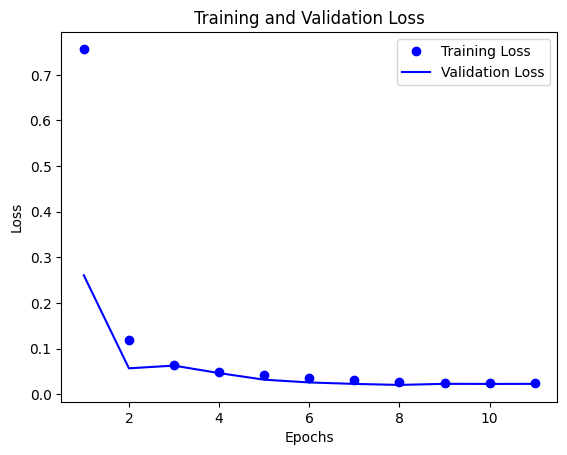

In [2094]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2095]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Not Out            806 non-null    int64  
 1   Out                806 non-null    int64  
 2   bowled             806 non-null    int64  
 3   caught             806 non-null    int64  
 4   caught and bowled  806 non-null    int64  
 5   lbw                806 non-null    int64  
 6   no wicket          806 non-null    int64  
 7   run out            806 non-null    int64  
 8   stumped            806 non-null    int64  
 9   striker            806 non-null    int64  
 10  batting_team       806 non-null    int64  
 11  Num_Balls_Played   806 non-null    float64
 12  venue              806 non-null    int64  
 13  Strike_Rate        806 non-null    float64
 14  Total_Six          806 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 94.6 KB


In [2096]:
Most_six_batsmen

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
3,0,0,0,0,0,0,1,0,0,31,7,122,8,123.566311,3
11,0,0,0,0,0,0,1,0,0,107,7,98,8,117.910306,5
13,0,0,0,1,0,0,0,0,0,145,7,1,8,0.000000,0
53,0,0,0,1,0,0,0,0,0,5,9,57,1,134.190000,3
57,0,0,0,0,0,0,1,0,0,24,9,24,1,138.587083,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0,1,0,0,0,0,0,0,0,130,5,32,5,159.400000,4
802,0,1,0,0,0,0,0,0,0,142,5,56,5,91.100000,1
803,1,0,0,0,0,0,0,0,0,122,5,94,5,136.200000,5
804,0,1,0,0,0,0,0,0,0,61,5,64,5,159.400000,4


Now using train model to predict the most sixes for selected Batsmen

In [2097]:
selected_batsmen_encoded = Most_six_batsmen['striker'].unique()
print(f"selected_batsmen_encoded: {selected_batsmen_encoded}")

selected_batsmen_encoded: [ 31 107 145   5  24  38  40  69 105 131   2   7  17  25  37  41  50  57
  61  70  73  83 103 110 121 122 142  27  36  78  79  84 136  56  58  59
  82  62 130  35  64 112  65  92 108 119 133 132  52 135  54  63 134   6]


In [2098]:
# Function to predict most six for batsmen
def predict_six_for_batsmen(model, Most_six_batsmen, scaler, sequence_length):
    selected_sequences = []
    for batsman in Most_six_batsmen['striker'].unique().tolist():
        batsman_data = Most_six_batsmen[Most_six_batsmen['striker'] == batsman]
        batsman_data = batsman_data.copy()
        batsman_sequence = batsman_data.iloc[-sequence_length:, :-1].values  # Assuming the same features as the model input
        # batsman_sequence = np.asarray(batsman_sequence).astype('float32')
        predicted_six = model.predict(np.array([batsman_sequence]))

        avg_values = batsman_data.mean()
        # Not Out	Out	bowled	caught	caught and bowled	lbw	no wicket	run out	stumped	striker	batting_team	Num_Balls_Played	venue	Strike_Rate	Total_Six
        predicted_row = pd.DataFrame({
            'Not Out': [int(avg_values['Not Out'])],
            'Out': [1 - int(avg_values['Not Out'])],
            'bowled': [int(avg_values['bowled'])],
            'caught': [int(avg_values['caught'])],
            'caught and bowled': [int(avg_values['caught and bowled'])],
            'lbw': [int(avg_values['lbw'])],
            'no wicket': [int(avg_values['no wicket'])],
            'run out': [int(avg_values['run out'])],
            'stumped': [int(avg_values['stumped'])],
            'striker': [batsman],
            'batting_team': [int(avg_values['batting_team'])],
            'Num_Balls_Played': [int(avg_values['Num_Balls_Played'])],
            'venue' : [int(avg_values['venue'])],
            'Strike_Rate': [avg_values['Strike_Rate']],
            'Total_Six': int(predicted_six[0]),
        })

        print(predicted_row)
        Most_six_batsmen = pd.concat([Most_six_batsmen, predicted_row], ignore_index=True)

    Most_six_batsmen.sort_values(by='striker', inplace=True)

    return Most_six_batsmen

In [2099]:
predicted_df_initial = predict_six_for_batsmen(model, Most_six_batsmen, scaler, sequence_length)

1/1 [==============================] - 0s 171ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0       31             7                40      6    69.475269   

   Total_Six  
0          0  
1/1 [==============================] - 0s 23ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0      107             7                59      6    74.585172   

   Total_Six  
0          2  
1/1 [==============================] - 0s 21ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   s

In [2100]:
predicted_df_initial

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
147,0,0,0,0,0,0,1,0,0,2,2,1,1,100.000000,0
40,0,0,0,0,0,0,1,0,0,2,2,16,2,66.638750,0
168,0,0,1,0,0,0,0,0,0,2,2,3,4,0.000000,0
305,0,1,0,0,0,0,0,0,0,2,2,10,4,62.765633,5
233,0,0,0,1,0,0,0,0,0,2,2,19,8,146.353684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0,0,0,1,0,0,0,0,0,145,7,80,9,82.773875,2
139,0,0,1,0,0,0,0,0,0,145,7,27,4,82.614444,0
215,0,0,0,1,0,0,0,0,0,145,7,37,7,78.915135,0
2,0,0,0,1,0,0,0,0,0,145,7,1,8,0.000000,0


54 instances more added through prediction of total sixes scored by each batsman in both the semi finals.Now as or task 2 predicts that final will be between INDIA and South Africa. So i am going to predict the batsmens wise most sixes in final

In [2101]:
finale_teams_decoded = ['India', 'South Africa']
finale_teams_encoded = [5, 9]

In [2102]:
finale_batsmen_df = predicted_df_initial[predicted_df_initial['batting_team'].isin(finale_teams_encoded)]
finale_batsmen_df

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
41,0,0,0,1,0,0,0,0,0,5,9,46,2,79.666304,1
157,0,0,0,1,0,0,0,0,0,5,9,96,6,112.307500,3
140,0,0,0,1,0,0,0,0,0,5,9,70,10,69.258286,0
199,0,0,0,0,0,0,1,0,0,5,9,1,7,600.000000,1
112,0,0,0,1,0,0,0,0,0,5,9,46,10,99.549783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,0,0,1,0,0,0,0,0,142,5,9,2,0.000000,0
39,0,0,0,0,0,0,1,0,0,142,5,57,1,88.002632,0
26,0,0,0,1,0,0,0,0,0,142,5,119,6,54.649748,0
69,0,0,0,1,0,0,0,0,0,142,5,19,8,72.751053,0


In [2103]:
finale_batsmen_encoded = finale_batsmen_df['striker'].unique().tolist()
finale_batsmen_decoded = [batsman for num in finale_batsmen_encoded for batsman, value in batsmen_map.items() if value == num]

In [2104]:
predicted_df_finale = predict_six_for_batsmen(model, finale_batsmen_df, scaler, sequence_length)

1/1 [==============================] - 0s 31ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0        5             9                39      5   152.020231   

   Total_Six  
0          2  
1/1 [==============================] - 0s 36ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          1        0   

   stumped  striker  batting_team  Num_Balls_Played  venue  Strike_Rate  \
0        0        6             9                40      8     45.53225   

   Total_Six  
0         -1  
1/1 [==============================] - 0s 39ms/step
   Not Out  Out  bowled  caught  caught and bowled  lbw  no wicket  run out  \
0        0    1       0       0                  0    0          0        0   

   st

In [2105]:
predicted_df_finale

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,1,0,0,0,0,0,5,9,46,2,79.666304,1
9,0,1,0,0,0,0,0,0,0,5,9,39,5,152.020231,15
8,0,0,0,1,0,0,0,0,0,5,9,57,1,134.190000,3
7,0,0,1,0,0,0,0,0,0,5,9,3,4,61.110000,0
6,0,0,0,1,0,0,0,0,0,5,9,6,3,145.278333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,0,0,1,0,0,0,0,0,142,5,9,2,0.000000,0
160,0,0,0,0,0,0,1,0,0,142,5,57,1,88.002632,0
161,0,0,0,1,0,0,0,0,0,142,5,119,6,54.649748,0
163,0,1,0,0,0,0,0,0,0,142,5,76,5,75.237830,6


In [2106]:
final_df = pd.concat([predicted_df_initial, predicted_df_finale], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [2107]:
final_df

,Not Out,Out,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Six
0,0,0,0,0,0,0,1,0,0,2,2,1,1,100.000000,0
1,0,0,0,0,0,0,1,0,0,2,2,16,2,66.638750,0
2,0,0,1,0,0,0,0,0,0,2,2,3,4,0.000000,0
3,0,1,0,0,0,0,0,0,0,2,2,10,4,62.765633,5
4,0,0,0,1,0,0,0,0,0,2,2,19,8,146.353684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,0,0,0,0,0,0,122,5,44,5,84.634255,0
363,0,1,0,0,0,0,0,0,0,130,5,37,5,100.665576,1
364,0,1,0,0,0,0,0,0,0,131,9,28,4,74.042397,3
365,0,1,0,0,0,0,1,0,0,132,9,5,4,94.438393,0


In [2108]:
batsmen_name_map = {v: k for k, v in batsmen_map.items()}
teams_name_map = {v: k for k, v in teams_map.items()}

In [2109]:
final_df['striker'] = final_df['striker'].map(batsmen_name_map)
final_df['batting_team'] = final_df['batting_team'].map(teams_name_map)

In [2110]:
six_by_batsman = final_df.groupby(['striker', 'batting_team'])['Total_Six'].sum().reset_index()

In [2111]:
six_by_batsman.sort_values(by = ['Total_Six'],ascending = False,inplace = True)

In [2112]:
top_5_batsmen = six_by_batsman.head(5)
top_5_batsmen

,striker,batting_team,Total_Six
40,RG Sharma,India,35
37,Q de Kock,South Africa,33
11,GJ Maxwell,Australia,30
1,AK Markram,South Africa,26
33,MR Marsh,Australia,25


In [2113]:
Most_six_batsmen['striker'] = Most_six_batsmen['striker'].map(batsmen_name_map)
Most_six_batsmen['batting_team'] = Most_six_batsmen['batting_team'].map(teams_name_map)

In [2114]:
Most_six_batsmen = Most_six_batsmen.groupby(['striker', 'batting_team'])['Total_Six'].sum().reset_index()
Most_six_batsmen.sort_values(by= ['Total_Six'],ascending = False).head(5)

,striker,batting_team,Total_Six
40,RG Sharma,India,24
11,GJ Maxwell,Australia,22
37,Q de Kock,South Africa,21
33,MR Marsh,Australia,20
6,DA Warner,Australia,20
